In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import os
from helper import train_VAE 
import json

In [3]:
X_train = pd.read_csv('../datasets/Toy/X_train.csv',index_col=0)  
X_test = pd.read_csv('../datasets/Toy/X_test.csv',index_col=0)  
y_train = pd.read_csv('../datasets/Toy/y_train.csv',index_col=0)  
y_test = pd.read_csv('../datasets/Toy/y_test.csv',index_col=0)  
X_train_con=X_train.drop(columns=['x1'])
X_test_con=X_test.drop(columns=['x1'])

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_con)
X_test_scaled = scaler.transform(X_test_con)

In [6]:
best_config={'config': {'x_dim': 5,
  'z_dim': 3,
  'zz_dim': 1,
  'encoder_z_layers': [64, 64, 64],
  'encoder_zz_layers': [10, 10],
  'decoder_layers': [64, 64, 64, 5],
  'fc_z_to_y_layers': [32, 32, 32, 1]},
 'beta': {'b1': 10000, 'b2': 1, 'b3': 1, 'b4': 10000, 'b5': 1},
 'lr': 0.001,
 'batch_size': 1024,
 'num_epochs': 500}

In [8]:
import itertools

# Define the ranges for your parameters
x_dim_values = [X_train_con.shape[1]]
z_dim_values = [3]
zz_dim_values = [1]
encoder_z_layers_values = [[64, 64, 64]]
encoder_zz_layers_values = [[10,10]]
#decoder_layers_values = [[14,X_train_with_confounder.shape[1]],[32, 32,X_train_with_confounder.shape[1]],[128,128,128,X_train_with_confounder.shape[1]]]
fc_z_to_y_layers_values = [[32, 32, 32, 1],]

# Get all combinations
configurations = list(itertools.product(x_dim_values, z_dim_values, zz_dim_values, encoder_z_layers_values, encoder_zz_layers_values, fc_z_to_y_layers_values))

# Convert to a list of dictionaries
config_dicts = [{'x_dim': x_dim, 'z_dim': z_dim, 'zz_dim': zz_dim, 'encoder_z_layers': encoder_z_layers, 'encoder_zz_layers': encoder_zz_layers, 'decoder_layers': encoder_z_layers+ [x_dim], 'fc_z_to_y_layers': fc_z_to_y_layers} for x_dim, z_dim, zz_dim, encoder_z_layers, encoder_zz_layers, fc_z_to_y_layers in configurations]
print(config_dicts)

[{'x_dim': 5, 'z_dim': 3, 'zz_dim': 1, 'encoder_z_layers': [64, 64, 64], 'encoder_zz_layers': [10, 10], 'decoder_layers': [64, 64, 64, 5], 'fc_z_to_y_layers': [32, 32, 32, 1]}]


In [9]:
# Define betas
BETAS=[
    #{'b1': 6, 'b2': 1, 'b3': 1, 'b4': 6,'b5':1},
    #{'b1': 1, 'b2': 1, 'b3': 1, 'b4': 1000,'b5':1},
    #{'b1': 100, 'b2': 1, 'b3': 100, 'b4': 100,'b5':1},
    #{'b1': 100,'b2': 1, 'b3': 1, 'b4': 10,'b5':1},  
    #{'b1': 10000, 'b2': 1, 'b3': 1, 'b4': 10000,'b5':1},
    {'b1': 10000, 'b2': 1, 'b3': 1, 'b4': 10000,'b5':1}
]
import itertools

# Define the ranges for your parameters
lr_values = [1e-3]
batch_size_values = [1024]
num_epochs_values = [500]

# Get all combinations
configs = list(itertools.product(config_dicts, BETAS, lr_values, batch_size_values, num_epochs_values))

# Convert to a list of dictionaries
configs = [{'config': config, 'beta': beta, 'lr': lr, 'batch_size': bs, 'num_epochs': epochs} for config, beta, lr, bs, epochs in configs]
print(len(configs))

1


In [10]:
#train_VAE(X_train,X_test,X_test_original,y_train,y_test,configs,path,save_pictures=False,freeze_weights=True,wabdb=False,dropout=False,z_and_zz_to_y=True)

In [10]:
dict_d=dict(configs[0])

# No Freez and z and zz to y 

{'config': {'x_dim': 5, 'z_dim': 3, 'zz_dim': 1, 'encoder_z_layers': [64, 64, 64], 'encoder_zz_layers': [10, 10], 'decoder_layers': [64, 64, 64, 5], 'fc_z_to_y_layers': [32, 32, 32, 1]}, 'beta': {'b1': 10000, 'b2': 1, 'b3': 1, 'b4': 10000, 'b5': 1}, 'lr': 0.001, 'batch_size': 1024, 'num_epochs': 500}
False
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             384
              ReLU-2                   [-1, 64]               0
            Linear-3                   [-1, 64]           4,160
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 64]           4,160
              ReLU-6                   [-1, 64]               0
            Linear-7                    [-1, 3]             195
            Linear-8                    [-1, 3]             195
            Linear-9                   [-1, 10]    

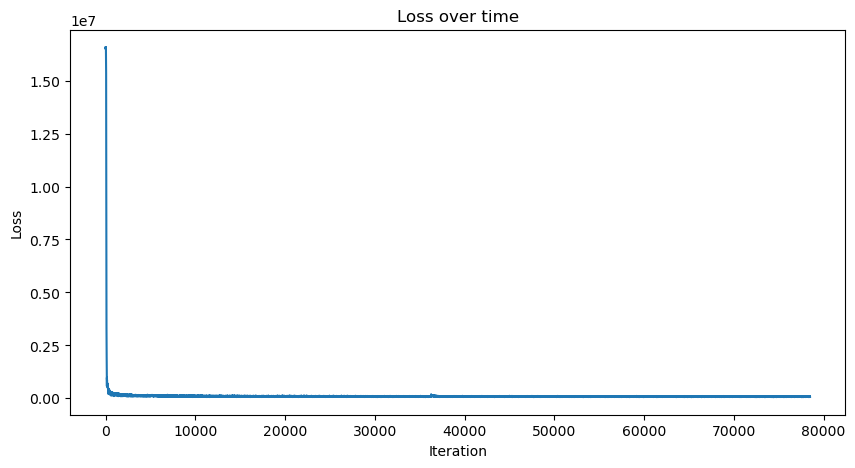

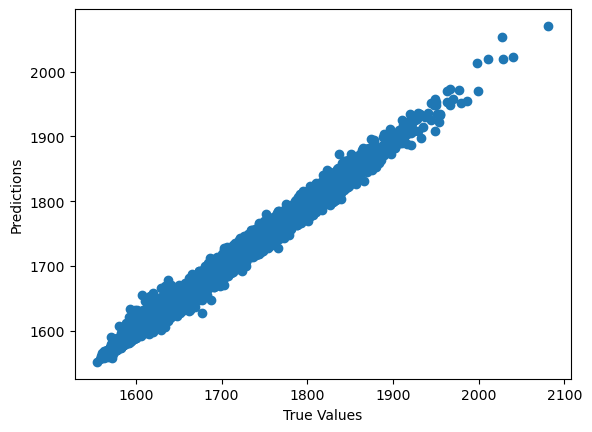

                 0
0      1617.993424
1      1780.596763
2      1679.185088
3      1842.917089
4      1614.700338
...            ...
39995  1620.016923
39996  1619.385255
39997  1658.525709
39998  1621.077476
39999  1659.871408

[40000 rows x 1 columns]
         x0        x1        x2        x3          x4  x5        z1        z2  \
0  1.368980  4.086941  0.202592  0.632863  163.703988   0  2.152660 -2.636229   
1  2.912908  7.520877  0.912839  2.794706  152.213650   0  2.400813 -3.038751   
2  0.616969  2.248328  1.349369  1.782977  149.914616   0  2.303287 -2.815571   
3  3.095454  7.662474  1.113563  3.146231  168.414618   1  2.552233 -3.012211   
4  0.582193  3.657382 -0.416928  1.120685  159.910121   0  2.053883 -2.670180   

         z3       zz1            0  
0  1.833230  0.945260  1617.993424  
1  1.996248  0.990359  1780.596763  
2  1.835813  0.944026  1679.185088  
3  2.267807  1.006204  1842.917089  
4  1.869383  0.932540  1614.700338  
heatmap_VAE_xdim5_zdim3_zzdim1_lr0001

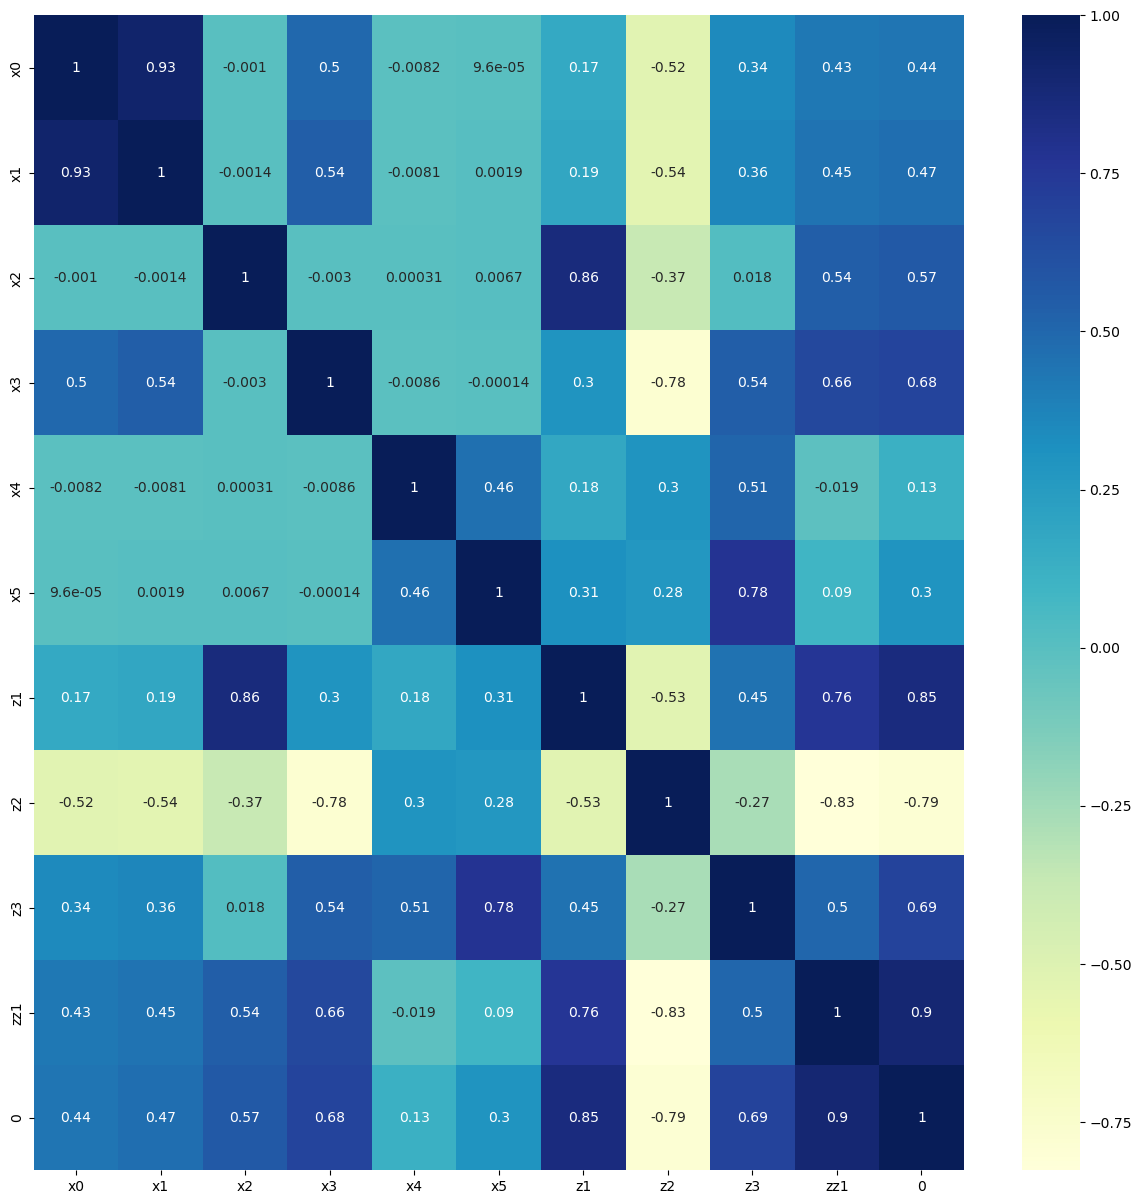

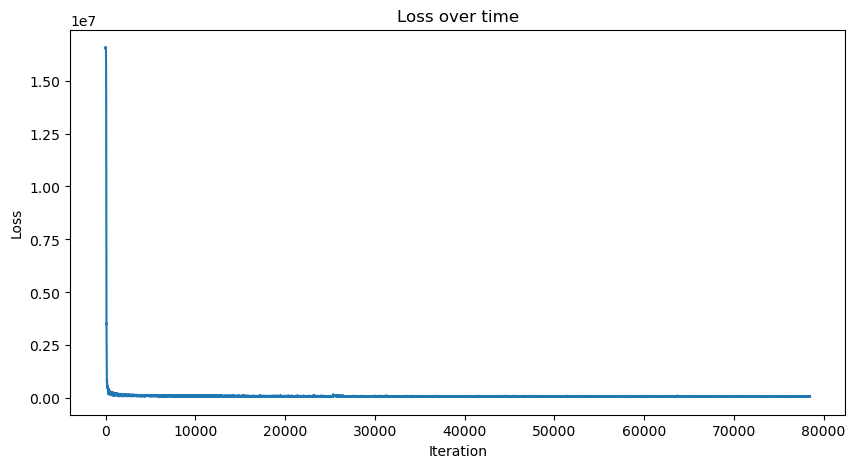

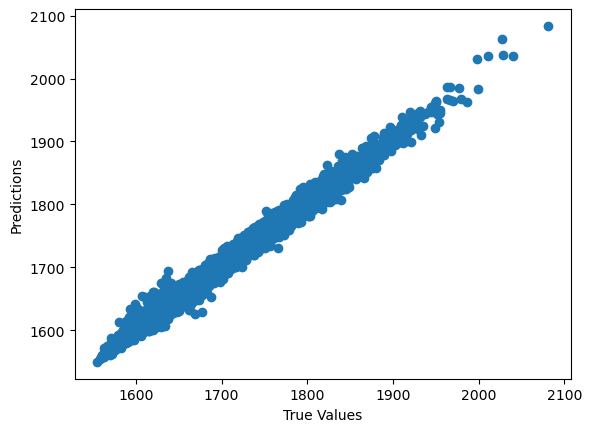

                 0
0      1617.993424
1      1780.596763
2      1679.185088
3      1842.917089
4      1614.700338
...            ...
39995  1620.016923
39996  1619.385255
39997  1658.525709
39998  1621.077476
39999  1659.871408

[40000 rows x 1 columns]
         x0        x1        x2        x3          x4  x5        z1        z2  \
0  1.368980  4.086941  0.202592  0.632863  163.703988   0  2.473493  1.900823   
1  2.912908  7.520877  0.912839  2.794706  152.213650   0  2.827298  2.174145   
2  0.616969  2.248328  1.349369  1.782977  149.914616   0  2.686321  1.955642   
3  3.095454  7.662474  1.113563  3.146231  168.414618   1  2.802478  2.279407   
4  0.582193  3.657382 -0.416928  1.120685  159.910121   0  2.459783  1.972333   

         z3       zz1            0  
0 -1.882571 -1.216647  1617.993424  
1 -2.091844 -1.275986  1780.596763  
2 -1.949936 -1.230584  1679.185088  
3 -2.417560 -1.303008  1842.917089  
4 -1.812525 -1.212003  1614.700338  
heatmap_VAE_xdim5_zdim3_zzdim1_lr0001

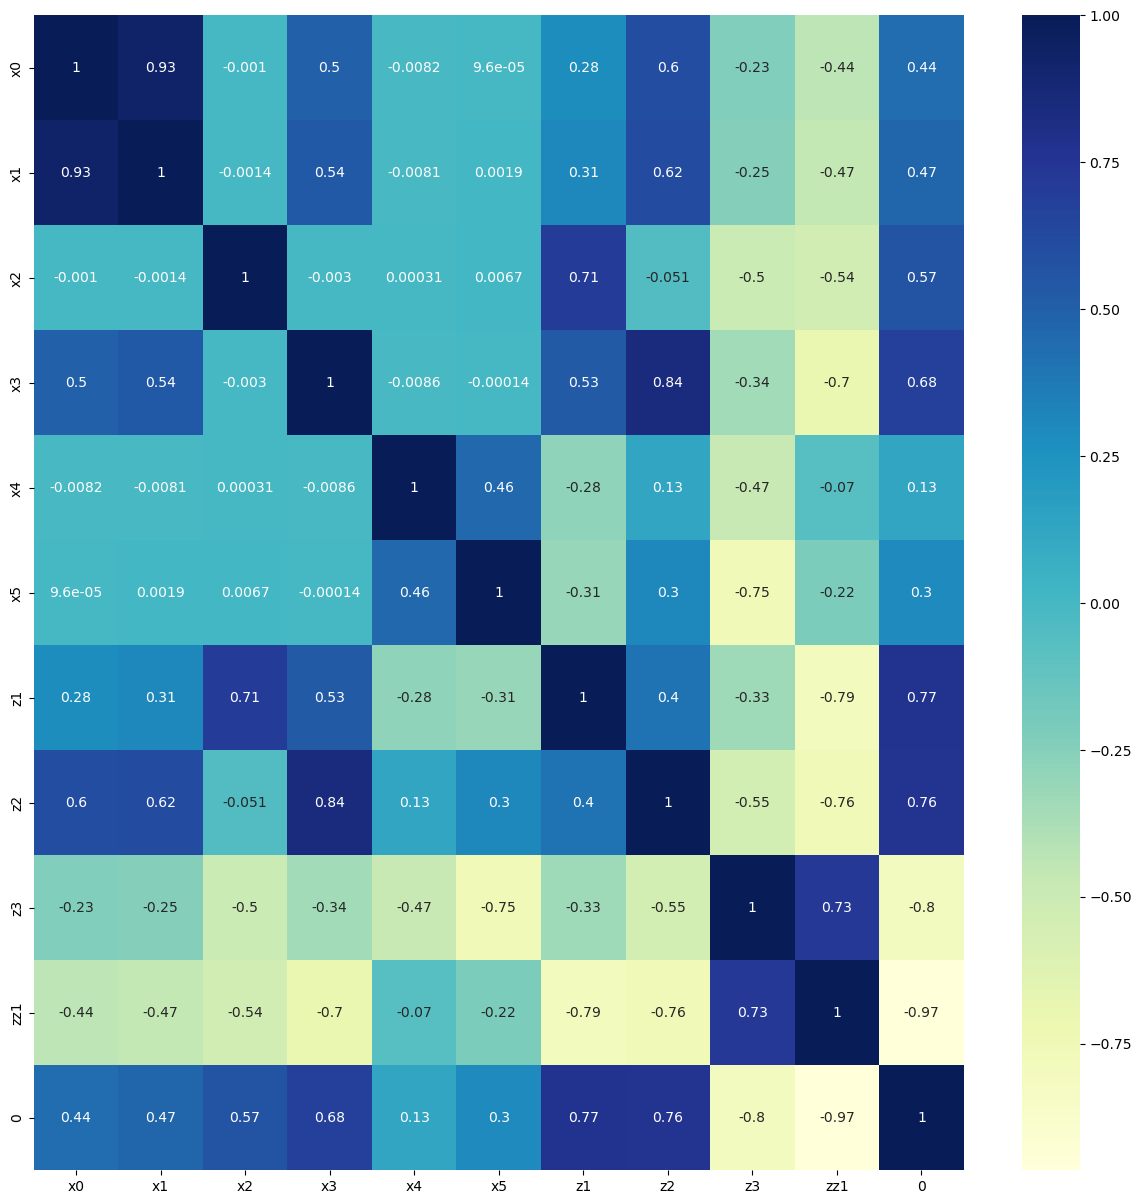

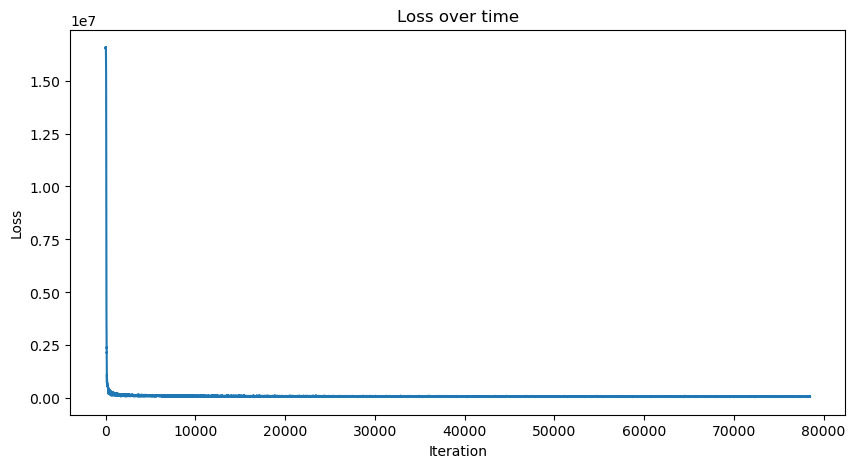

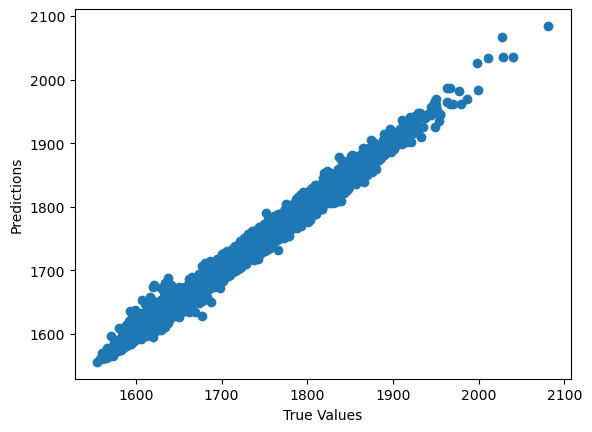

                 0
0      1617.993424
1      1780.596763
2      1679.185088
3      1842.917089
4      1614.700338
...            ...
39995  1620.016923
39996  1619.385255
39997  1658.525709
39998  1621.077476
39999  1659.871408

[40000 rows x 1 columns]
         x0        x1        x2        x3          x4  x5        z1        z2  \
0  1.368980  4.086941  0.202592  0.632863  163.703988   0  1.900261 -2.546933   
1  2.912908  7.520877  0.912839  2.794706  152.213650   0  2.071343 -2.901818   
2  0.616969  2.248328  1.349369  1.782977  149.914616   0  1.934859 -2.662044   
3  3.095454  7.662474  1.113563  3.146231  168.414618   1  2.455083 -2.968654   
4  0.582193  3.657382 -0.416928  1.120685  159.910121   0  1.942112 -2.540681   

         z3       zz1            0  
0 -2.257921  0.761399  1617.993424  
1 -2.572273  0.757708  1780.596763  
2 -2.451375  0.731340  1679.185088  
3 -2.505432  0.734534  1842.917089  
4 -2.220847  0.746655  1614.700338  
heatmap_VAE_xdim5_zdim3_zzdim1_lr0001

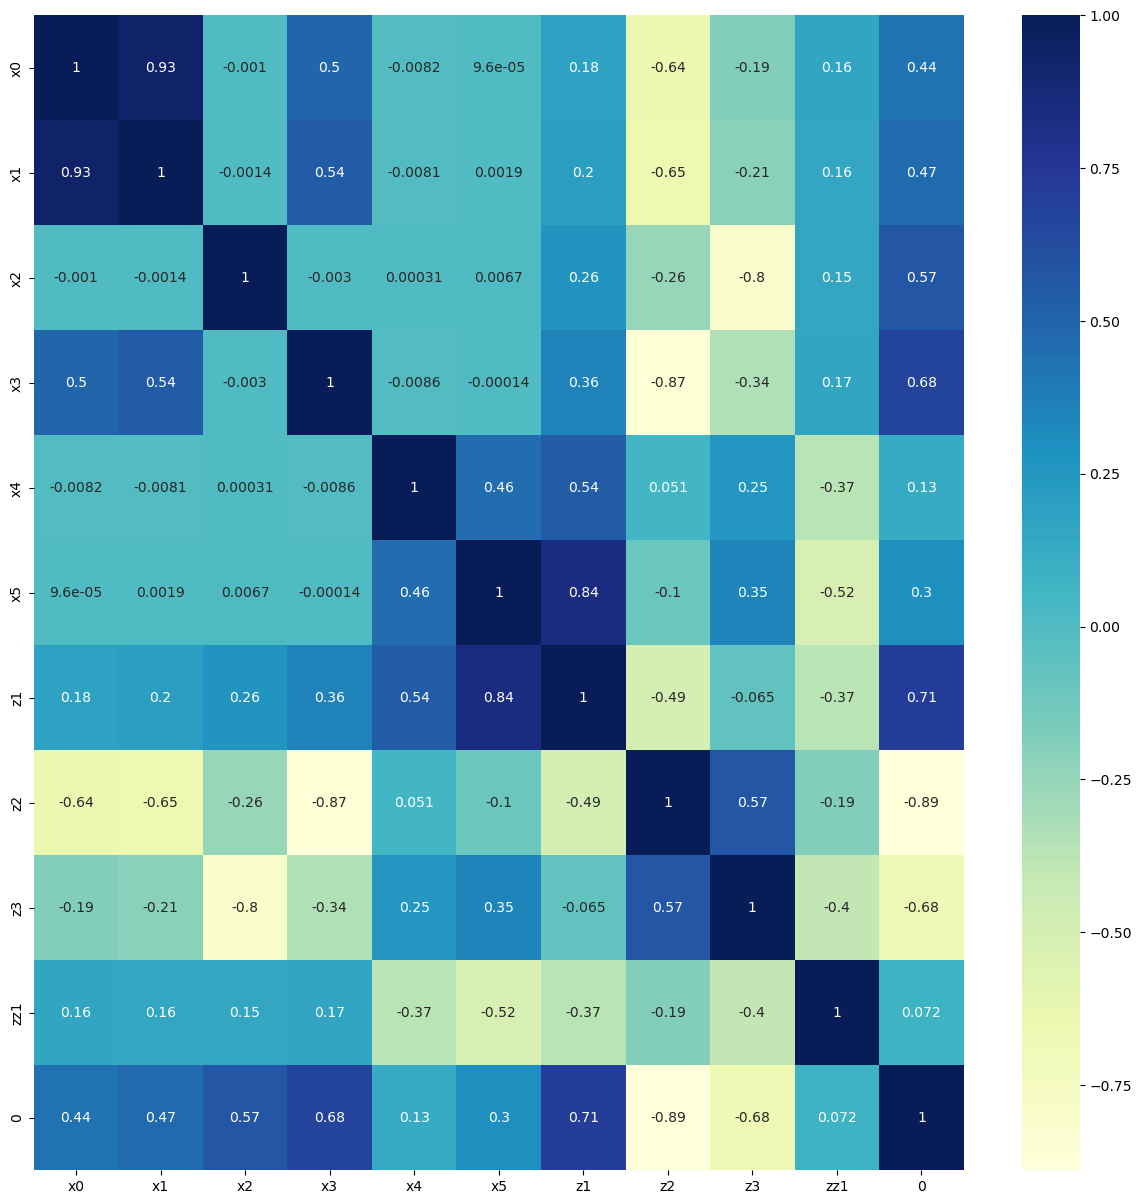

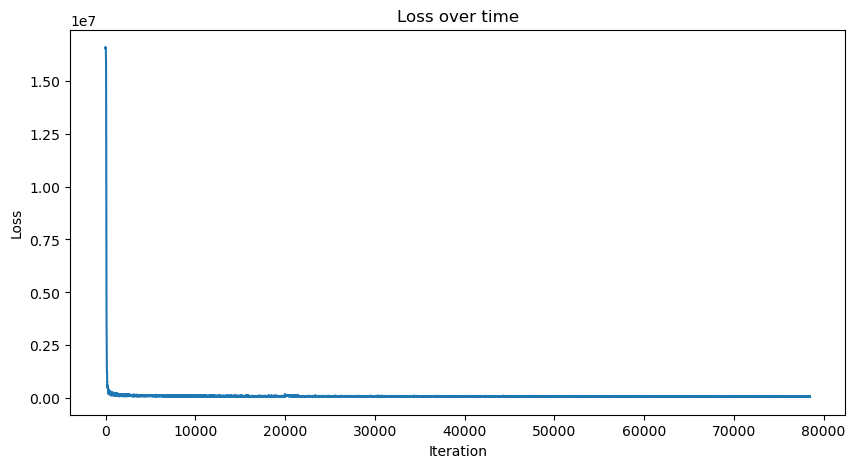

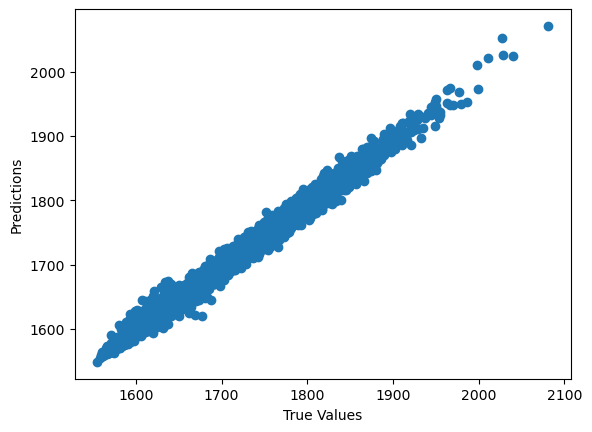

                 0
0      1617.993424
1      1780.596763
2      1679.185088
3      1842.917089
4      1614.700338
...            ...
39995  1620.016923
39996  1619.385255
39997  1658.525709
39998  1621.077476
39999  1659.871408

[40000 rows x 1 columns]
         x0        x1        x2        x3          x4  x5        z1        z2  \
0  1.368980  4.086941  0.202592  0.632863  163.703988   0 -1.527791 -2.624454   
1  2.912908  7.520877  0.912839  2.794706  152.213650   0 -1.712507 -3.011296   
2  0.616969  2.248328  1.349369  1.782977  149.914616   0 -1.501151 -2.783010   
3  3.095454  7.662474  1.113563  3.146231  168.414618   1 -1.960600 -2.987983   
4  0.582193  3.657382 -0.416928  1.120685  159.910121   0 -1.559194 -2.638938   

         z3       zz1            0  
0  2.313838 -0.833205  1617.993424  
1  2.579234 -0.871558  1780.596763  
2  2.486986 -0.872658  1679.185088  
3  2.746010 -0.875250  1842.917089  
4  2.275285 -0.834410  1614.700338  
heatmap_VAE_xdim5_zdim3_zzdim1_lr0001

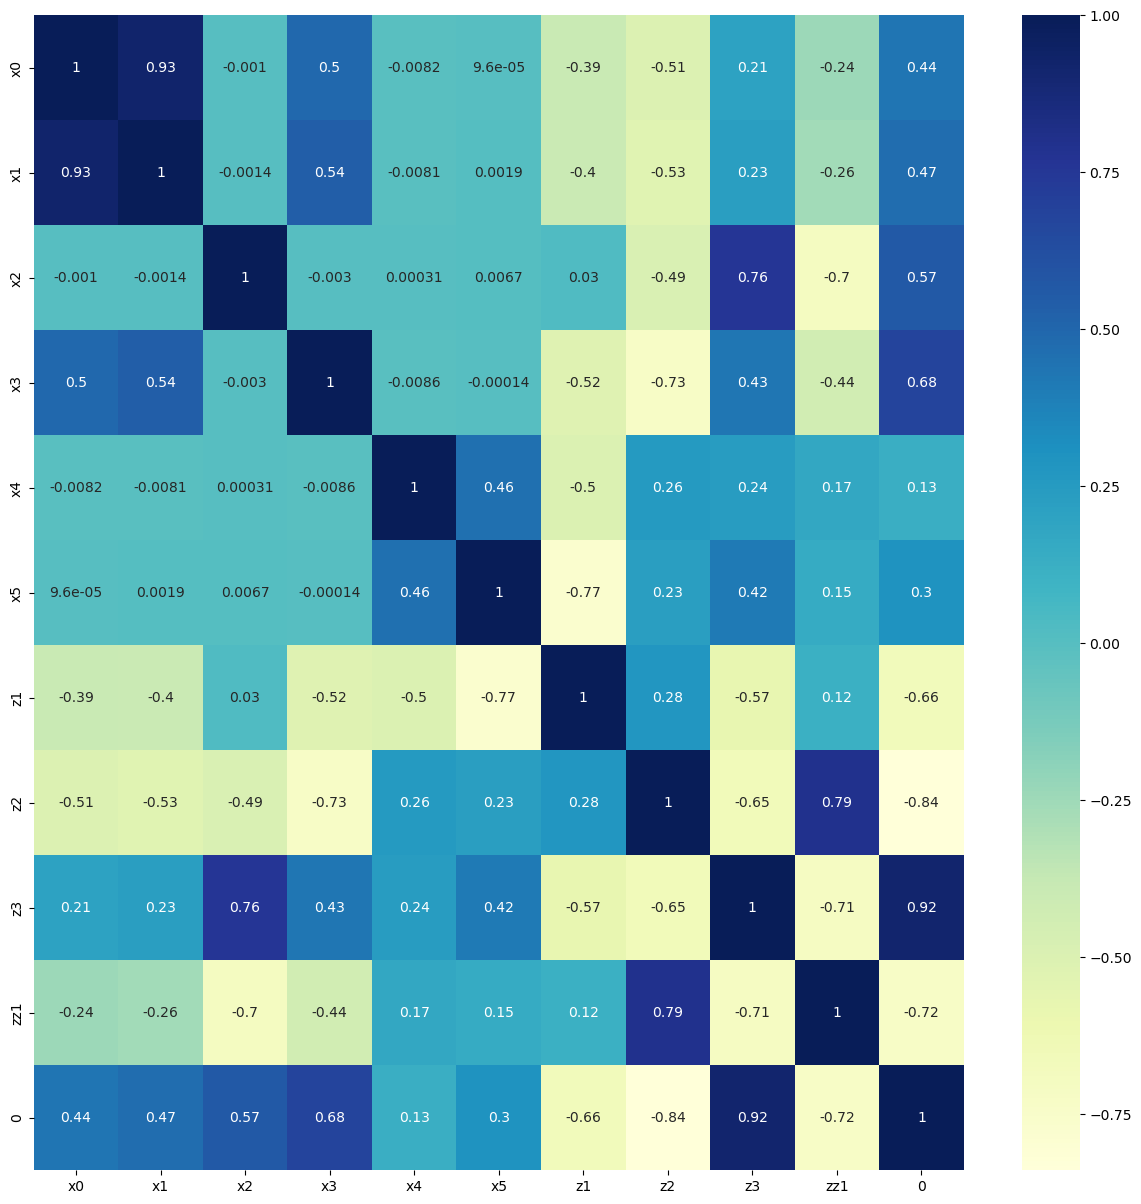

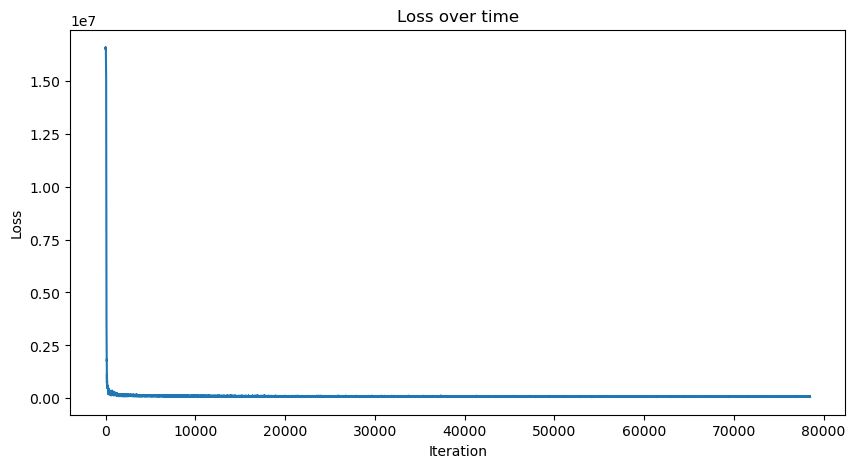

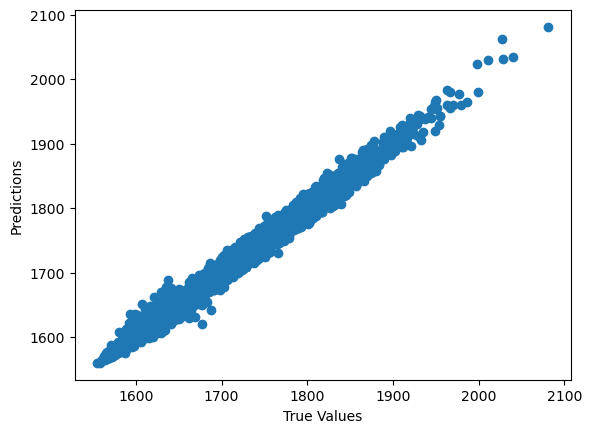

                 0
0      1617.993424
1      1780.596763
2      1679.185088
3      1842.917089
4      1614.700338
...            ...
39995  1620.016923
39996  1619.385255
39997  1658.525709
39998  1621.077476
39999  1659.871408

[40000 rows x 1 columns]
         x0        x1        x2        x3          x4  x5        z1        z2  \
0  1.368980  4.086941  0.202592  0.632863  163.703988   0 -1.866873  2.326233   
1  2.912908  7.520877  0.912839  2.794706  152.213650   0 -2.109207  2.679487   
2  0.616969  2.248328  1.349369  1.782977  149.914616   0 -1.865252  2.516999   
3  3.095454  7.662474  1.113563  3.146231  168.414618   1 -2.311769  2.575570   
4  0.582193  3.657382 -0.416928  1.120685  159.910121   0 -1.906662  2.331620   

         z3       zz1            0  
0 -2.157433 -1.255786  1617.993424  
1 -2.392946 -1.336748  1780.596763  
2 -2.293436 -1.291040  1679.185088  
3 -2.651504 -1.347948  1842.917089  
4 -2.103209 -1.246507  1614.700338  
heatmap_VAE_xdim5_zdim3_zzdim1_lr0001

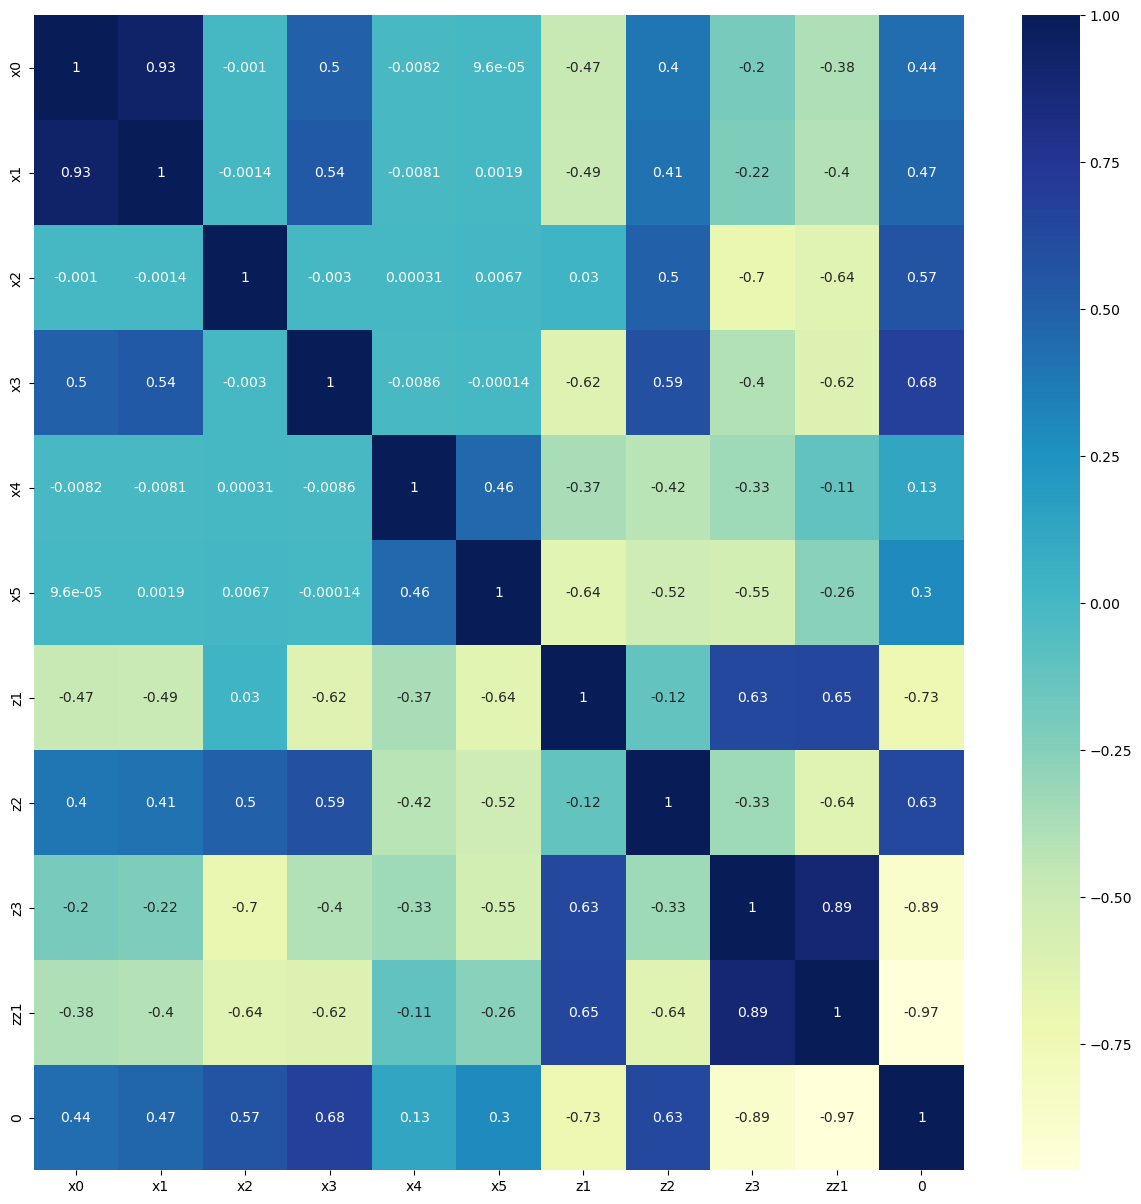

In [12]:
for i in range(5):
    mod,r,lt,ltt=train_VAE(X_train_scaled,X_test_scaled,X_test,y_train.values,y_test.values,configs[0],'./Test',save_pictures=True,freeze_weights=False)
    if r>0.988:
        dict_d=dict(configs[0])
        r2_text = str(r).replace(".", "_")
        torch.save(mod,f"./Toy/Final/Toy_No_freeze_z_and_zz_to_y_R2_{r2_text}_model.zip")
        with open(f"./Toy/Final/Config_Toy_No_freeze_z_and_zz_to_y_R2_{r2_text}.json", 'w') as outfile:
            json.dump(dict_d, outfile)